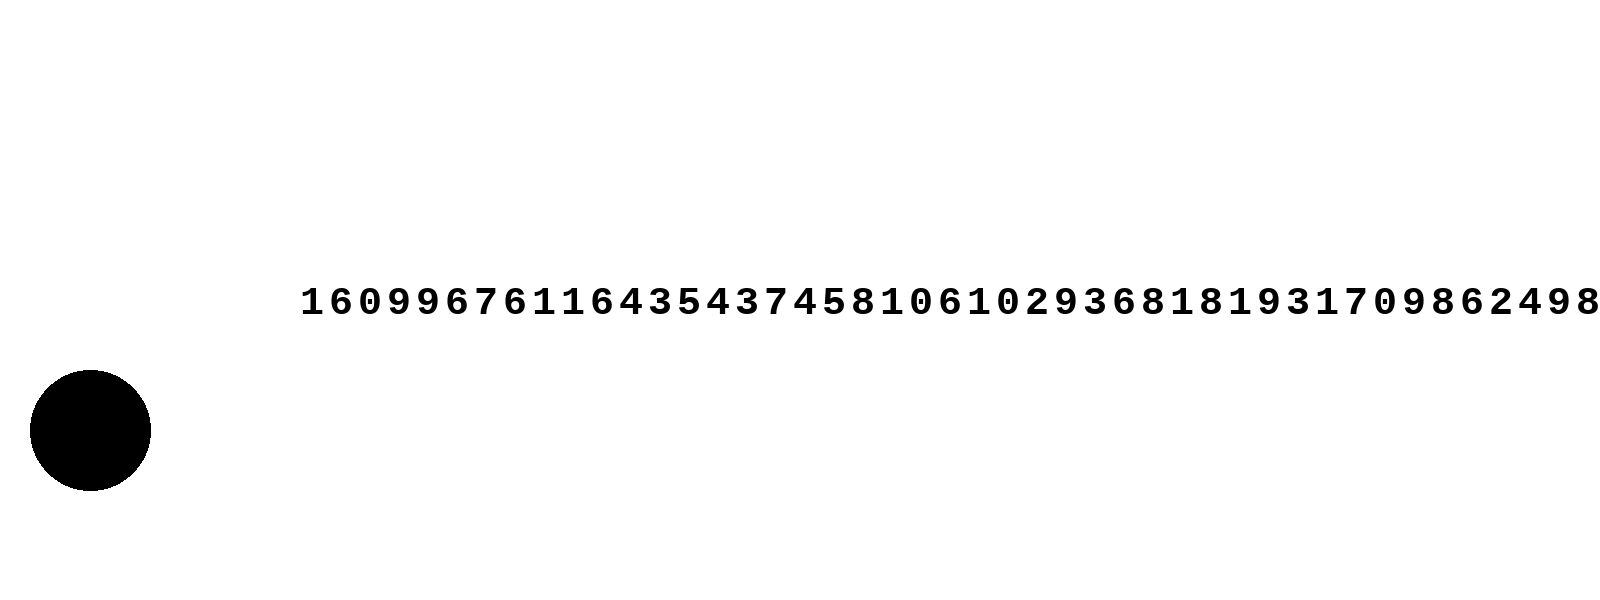

In [32]:
from PIL import Image, ImageDraw, ImageFont
import random
import string
import os
from IPython.display import Image as IPImage, display

# Function to generate a random sequence of digits (0-9)
def random_numbers(length=10):
    return ''.join(random.choices(string.digits, k=length))

# Create an image with random black numbers and a black circle
def generate_image_with_random_numbers(length=10, width=800, height=600, font_size=40):
    # Create a blank white image
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    # Load the specified TrueType font with the font size
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", font_size)
    except IOError:
        print("Font not found. Please ensure the path to the .ttf font is correct.")
        return

    # Get random numbers
    numbers = random_numbers(length)

    # Starting position for the numbers
    x = 300
    y = (height - font_size) // 2

    # Draw each number in black and with proper spacing
    for number in numbers:
        draw.text((x, y), number, font=font, fill="black")
        x += draw.textlength(number, font=font) + 5

    # Position and size for the black circle
    circle_radius = 60
    circle_x = circle_radius*1.5  # Positioned towards the left side of the image
    circle_y = y + circle_radius*2.5  # Lower than the numbers' baseline

    # Draw a black circle
    draw.ellipse(
        [circle_x - circle_radius, circle_y - circle_radius, 
         circle_x + circle_radius, circle_y + circle_radius], 
        fill="black"
    )

    # Save the image
    image.save("random_numbers_with_circle.png")
    
    # Open the image using a specific program (e.g., eog or xdg-open)
    # os.system("eog random_numbers_with_circle.png")
    display(IPImage("random_numbers_with_circle.png"))

# Generate the image
generate_image_with_random_numbers(length=45, font_size=40, width=1600, height=600)
